# 1. Introduction

In this project i will complete the analysis, cleaning, exploration of data analysis, conclusion and recommendation of Microsoft's business problem


# 2. Business Understanding

The film industry is populated with alot of movies that are being produced. Different companies produce different movies with different genres targetting different audience. 

Box Office being a ticket office they showcase the movies of different companies. They also show the most watched movie with the highest rating. Box Office is a good place for Microsoft to get to understand how the movie industry is so as to guide them while they produce a movie

# 2.1 Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# 2.2. Aim

There are numerous movies produced in the world.
In order to create a movie there is the need to know and understand what it takes to create one. This will guide in knowing what strategy to take to be able to create a great movie
The aim is to be able to know the types of films that are doing best in the Box Office so as to advice Micerosoft to be able to create their own

# 2.3. Objectives

1. To build a model that shows types of films in Box Office
2. To compare models to be able to get the highest rating film
3. Give advice to Microsoft on creating films

# 3. Data Understanding

The data was was acquired from Box Office. The data contains information about types of movies that are watched and the ones 

that have the highest rating in Box Office. The data has: Data Preparation,Data Cleaning, Exploratory Data Analysis (EDA), 

Conclusion and Recommendation. This data contained 49 rows and 14 columns.

# 4. Requirements

1. Data Preparation - Loading Libraries - Loading data - Descriptive Exploration 
2. Data Cleaning
3. Future Engineering
4. Exploratory Data Analysis (EDA)
5. Conclusion
6. Recommendation

# 5. Data Preparation

# 5.1. Loading Relevant Libraries

In [44]:
# Your code here - remember to use markdown cells for comments as well!
#import relevant libraries
import pandas as pd
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [45]:
#connecting to the database
conn = sqlite3.connect('im.db')

In [46]:
#execute sql commands
cur = conn.cursor()
cur

In [47]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

# 5.2. Loading datasets

loading datasets

In [48]:
#loading datasets
pd.read_sql("""
SELECT *
FROM movie_basics
;""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [49]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# 5.3. Explore movie_basics dataframes

Decriptive exploration of movie_basics data

In [50]:
#check head of dataframe
jk = pd.read_sql("""
SELECT *
FROM movie_basics
;
""", conn)
jk.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [51]:
#check tail of dataframe
jk.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [52]:
#check dataframe information
jk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [53]:
#check dataframe description
jk.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [54]:
#check missing values
jk.isnull()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146139,False,False,False,False,False,False
146140,False,False,False,False,True,False
146141,False,False,False,False,True,False
146142,False,False,False,False,False,True


In [55]:
#check boolean values
jk.bool

<bound method NDFrame.bool of          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad K

In [56]:
#check duplicates
jk.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool

In [57]:
#check value_counts
jk.value_counts()

movie_id   primary_title                           original_title                          start_year  runtime_minutes  genres                      
tt9916538  Kuambil Lagi Hatiku                     Kuambil Lagi Hatiku                     2019        123.0            Drama                           1
tt2716756  And They Call It Puppy Love             And They Call It Puppy Love             2013        93.0             Crime,Drama,Romance             1
tt2716062  The Giant Spider                        The Giant Spider                        2013        71.0             Horror,Sci-Fi                   1
tt2716194  Tamanna                                 Tamanna                                 2014        83.0             Crime,Drama,Thriller            1
tt2716206  Mrs. Highlander - Von einer die auszog  Mrs. Highlander - Von einer die auszog  2012        54.0             Biography,Documentary,Family    1
                                                                                 

# 6.1. Basics Cleaning

In [58]:
#checking for duplicates in rows
#With variable as a unique identifier it's easy to idenify duplicates
jk.duplicated().value_counts()
print(f'There are{jk.duplicated() .sum()} duplicates')

There are0 duplicates


In [59]:
#get missing values
jk.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [60]:
#check dataframe information
jk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [61]:
#dropping the row
jk.dropna(subset = ["original_title"] , inplace = True)

In [62]:
#checking missing values
jk.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    31722
genres              5389
dtype: int64

In [63]:
#replacing missing values
jk["runtime_minutes"].fillna(jk["runtime_minutes"].mean(), inplace = True)

In [64]:
#checking missing values
jk.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5389
dtype: int64

In [65]:
#dropping the row
jk.dropna(subset = ["genres"] , inplace = True)

In [66]:
#checking missing values
jk.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [67]:
#check dataframe information
jk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [68]:
#check dataframe types
jk.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [69]:
#checking the dataframe
jk

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.186126,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,86.186126,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.186126,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.186126,Comedy


# 7.1 Exploring movie_ratings dataframe

In [70]:
#check head of dataframe
sl = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""", conn)
sl.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [71]:
#check tail of dataframe
sl.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [72]:
#check dataframe information
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [73]:
#check dataframe description
sl.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [74]:
#check missing values
sl.isnull()

,movie_id,averagerating,numvotes
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
73851,False,False,False
73852,False,False,False
73853,False,False,False
73854,False,False,False


In [75]:
#check boolean values
sl.bool

<bound method NDFrame.bool of          movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [76]:
#check duplicates
sl.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [77]:
#check value_counts
sl.value_counts()

movie_id   averagerating  numvotes
tt9916160  6.5            11          1
tt2413182  9.2            13          1
tt2418372  5.9            866         1
tt2418384  7.0            13          1
tt2418440  6.3            4551        1
                                     ..
tt4861720  5.2            62          1
tt4861730  6.1            331         1
tt4862056  8.3            14          1
tt4862190  8.2            117         1
tt0063540  7.0            77          1
Length: 73856, dtype: int64

# 7.2. Ratings Cleaning

In [78]:
#checking for duplicates in rows
#With variable as a unique identifier it's easy to idenify duplicates
sl.duplicated().value_counts()
print(f'There are{sl.duplicated() .sum()} duplicates')

There are0 duplicates


In [79]:
#checking dataframe informaion
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [80]:
#get missing values
sl.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [81]:
#checking the dataframe
sl

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [82]:
#check dataframe types
sl.dtypes

movie_id          object
averagerating    float64
numvotes           int64
dtype: object

In [83]:
sl

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# 8.1. Future Engineering

In [84]:
#combining the two sql tables
q = """
SELECT * 
FROM movie_basics
JOIN movie_ratings
     USING(movie_id)
;
"""
df = pd.read_sql(q, conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


# 9. Loading dataset

# 9.1 Loading relevant libraries

Loading relevant libraries

In [85]:
sns.set(style ="darkgrid")
plt.style.use('seaborn-pastel')

# 9.2. Loading Dataset

# Loading Dataset

In [88]:
#Loading dataset
gt = pd.read_csv("bom.movie_gross.csv.gz")
gt

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# 9.3. Explore Dataframes

In [89]:
#check dataframe shapes
gt.shape

(3387, 5)

In [90]:
#check dataframe information
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [91]:
#check dataframe description
gt.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [92]:
#check missing values
gt.isnull()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [93]:
#check boolean values
gt.bool

<bound method NDFrame.bool of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0  

In [94]:
#check duplicates
gt.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

# 10. Bom.movie Data Cleaning

# 10.1 Consistency

In [95]:
#checking for duplicates in rows
#With variable as a unique identifier it's easy to idenify duplicates
gt.duplicated().value_counts()
print(f'There are{gt.duplicated() .sum()} duplicates')

There are0 duplicates


In [96]:
#get missing values
gt.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [97]:
#dropping the row
gt.dropna(subset = ["studio"] , inplace = True)

In [98]:
#checking missing values
gt.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [99]:
#checking the dataframe
gt

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [100]:
#getting informaion
gt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [101]:
#replacing missing values
gt["domestic_gross"].fillna(gt["domestic_gross"].mean(), inplace = True)

In [102]:
#checking missing values
gt.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

In [103]:
#dropping missing values 
gt.dropna(subset = ["foreign_gross"] , inplace = True)

In [104]:
#checking missing values
gt.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [105]:
#checking the dataframe
gt

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [106]:
#check dataframe types
gt.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [107]:
#changing the data type
def replace_data(data, to_replace, value, col, regex_value):
    """replace values in the given column"""
    data[col].replace(to_replace, value,inplace = True, regex=regex_value)
replace_data(gt, ",", "", "foreign_gross", True)
gt["foreign_gross"] = gt["foreign_gross"].astype(float)

In [108]:
replace_data(gt, "''", "", "foreign_gross", True)
gt["foreign_gross"] = gt["foreign_gross"].astype(float)

In [109]:
#check dataframe information
gt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2033 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2033 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            2033 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.3+ KB


# 10.2 Future Engineering

In [110]:
#adding total gross
gt['total_gross'] = gt['domestic_gross'] + gt['foreign_gross']

In [111]:
gt.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [112]:
gt.tail()

,title,studio,domestic_gross,foreign_gross,year,total_gross
3275,I Still See You,LGF,1400.0,1500000.0,2018,1501400.0
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,954000.0
3309,Time Freak,Grindstone,10000.0,256000.0,2018,266000.0
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,73200.0


In [113]:
#combining sql tables with csv
jk.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.186126,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


# 11. Merging The Two Tables

In [114]:
#merging sql and csv table
jk["title"] = jk["original_title"]
m_merge = pd.merge(jk, gt, on = "title")
m_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.000000,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8744000.0
1,tt2404548,On the Road,On the Road,2011,90.000000,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt3872966,On the Road,On the Road,2013,87.000000,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt4339118,On the Road,On the Road,2014,89.000000,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt5389486,On the Road,On the Road,2015,39.000000,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1747,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.000000,"Comedy,Drama,Romance",Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0
1748,tt8306090,Leaving,Leaving,2017,50.000000,Drama,Leaving,IFC,176000.0,893000.0,2010,1069000.0
1749,tt8802728,The Witch,The Witch,2018,86.186126,Horror,The Witch,A24,25100000.0,15300000.0,2016,40400000.0
1750,tt8851262,Spring Fever,Spring Fever,2019,86.186126,"Comedy,Horror",Spring Fever,Strand,10800.0,150000.0,2010,160800.0


In [115]:
df["title"] = df["original_title"]
m_merge = pd.merge(df, gt, on = "title")
m_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,tt7690670,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Superfly,Sony,20500000.0,236000.0,2018,20736000.0
1567,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,Hereditary,A24,44100000.0,35300000.0,2018,79400000.0
1568,tt8011712,The Past,The Past,2018,120.0,"Drama,Horror",7.4,54,The Past,SPC,1300000.0,9300000.0,2013,10600000.0
1569,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0


In [116]:
#checking the information
m_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1571 non-null   object 
 1   primary_title    1571 non-null   object 
 2   original_title   1571 non-null   object 
 3   start_year       1571 non-null   int64  
 4   runtime_minutes  1535 non-null   float64
 5   genres           1567 non-null   object 
 6   averagerating    1571 non-null   float64
 7   numvotes         1571 non-null   int64  
 8   title            1571 non-null   object 
 9   studio           1571 non-null   object 
 10  domestic_gross   1571 non-null   float64
 11  foreign_gross    1571 non-null   float64
 12  year             1571 non-null   int64  
 13  total_gross      1571 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 184.1+ KB


In [117]:
#checking the value counts
m_merge["movie_id"].value_counts()

tt2193215    1
tt4258698    1
tt2692250    1
tt1298649    1
tt1560747    1
            ..
tt2121250    1
tt1449283    1
tt0963966    1
tt4761916    1
tt3715320    1
Name: movie_id, Length: 1571, dtype: int64

In [118]:
#checking the dataframe
m_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,tt7690670,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Superfly,Sony,20500000.0,236000.0,2018,20736000.0
1567,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,Hereditary,A24,44100000.0,35300000.0,2018,79400000.0
1568,tt8011712,The Past,The Past,2018,120.0,"Drama,Horror",7.4,54,The Past,SPC,1300000.0,9300000.0,2013,10600000.0
1569,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0


In [119]:
#checking the highest ratings
w = m_merge[m_merge["averagerating" ] > 8] 
w

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
18,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
42,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8,Unstoppable,Fox,81600000.0,86200000.0,2010,1.678000e+08
78,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,489400000.0,2014,6.774000e+08
100,tt0892769,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08
133,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,275100000.0,2013,3.920000e+08
136,tt10075374,The Little Prince,The Little Prince,2019,93.0,Action,8.3,6,The Little Prince,EOne,1300000.0,96200000.0,2016,9.750000e+07
141,tt6168914,The Runaways,The Runaways,2019,108.0,Adventure,9.2,47,The Runaways,App.,3600000.0,1100000.0,2010,4.700000e+06
179,tt2611518,Lights Out,Lights Out,2013,NaN,Drama,8.6,22,Lights Out,WB (NL),67300000.0,81600000.0,2016,1.489000e+08
208,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960,Shutter Island,Par.,128000000.0,166800000.0,2010,2.948000e+08
320,tt3840898,The Tempest,The Tempest,2014,169.0,"Comedy,Drama",8.5,171,The Tempest,Mira.,278000.0,68700.0,2010,3.467000e+05


In [120]:
#checking the rows and columns
w.shape

(49, 14)

#  12. Exploratory Data Analysis

# 12.1 Distribution of films

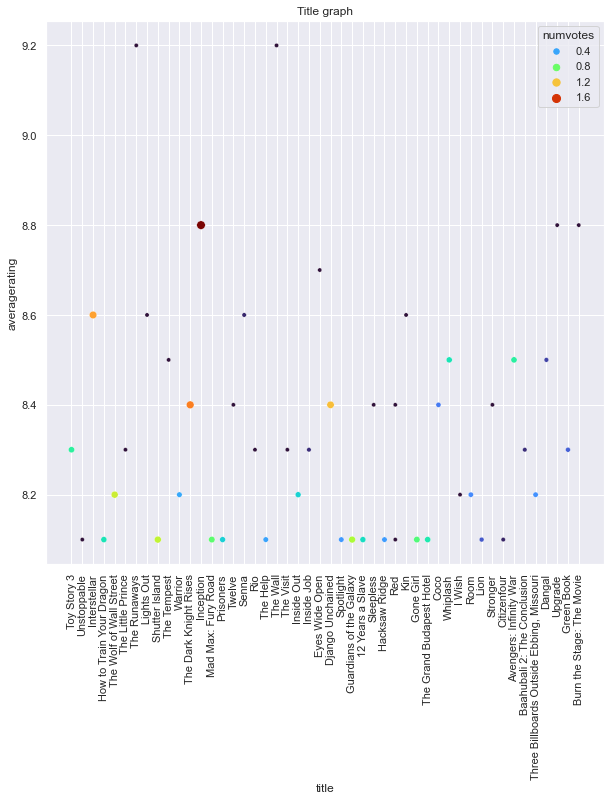

In [121]:
#plot the title graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = "title", y = "averagerating", data = w, hue = "numvotes", size = "numvotes", palette = "turbo")
plt.title("Title graph");
plt.xticks(rotation = 90);



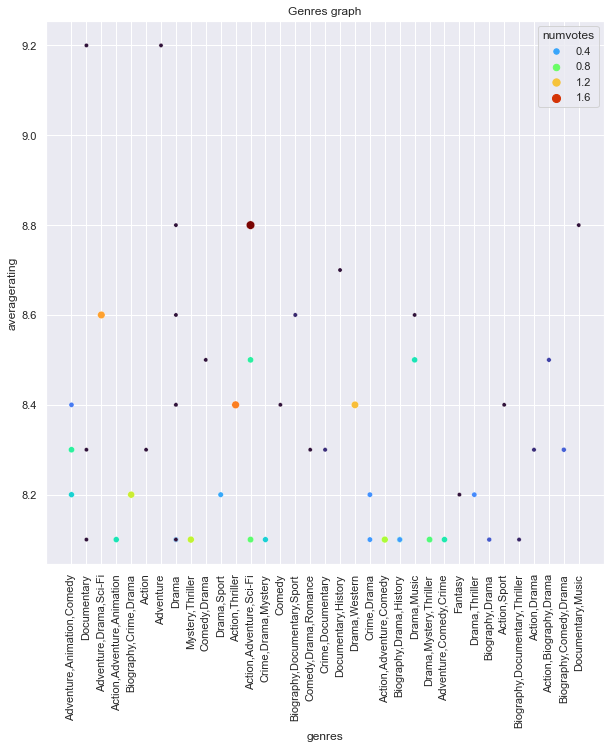

In [122]:
#plot the genres graphs
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = "genres", y = "averagerating", data = w, hue = "numvotes", size = "numvotes", palette = "turbo")
plt.title("Genres graph");
plt.xticks(rotation = 90);

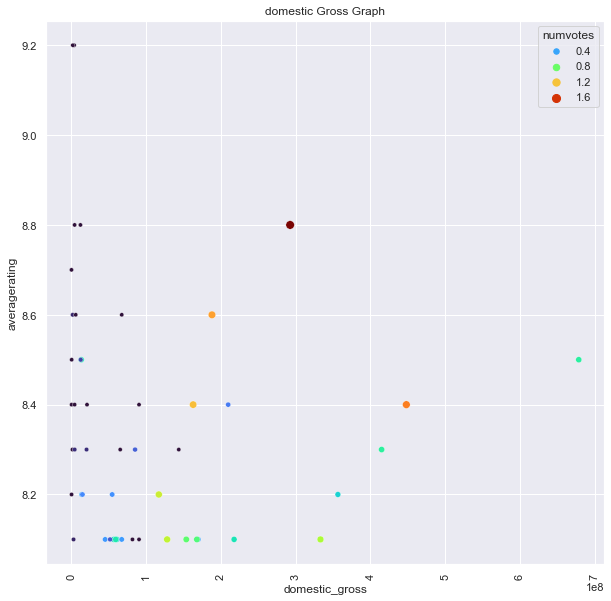

In [123]:
#checking the domestic gross
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = "domestic_gross", y = "averagerating", data = w, hue = "numvotes", size = "numvotes", palette = "turbo")
plt.title("domestic Gross Graph");
plt.xticks(rotation = 90);

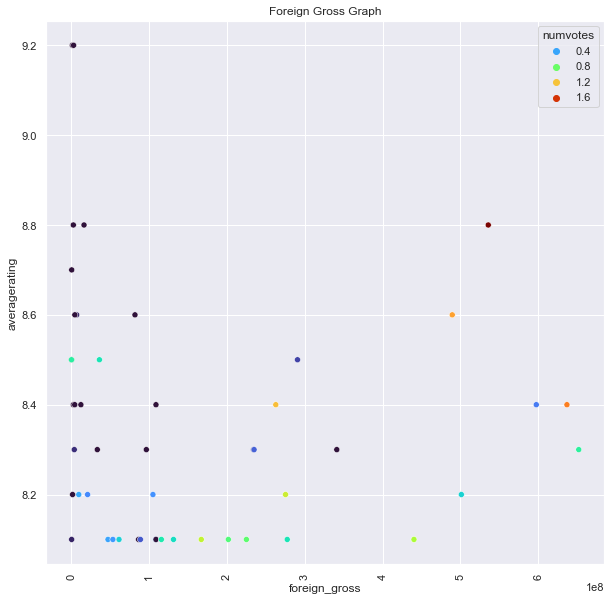

In [124]:
#checking the foreign gross
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = "foreign_gross", y = "averagerating", data = w, hue = "numvotes", palette = "turbo")
plt.title("Foreign Gross Graph");
plt.xticks(rotation = 90);

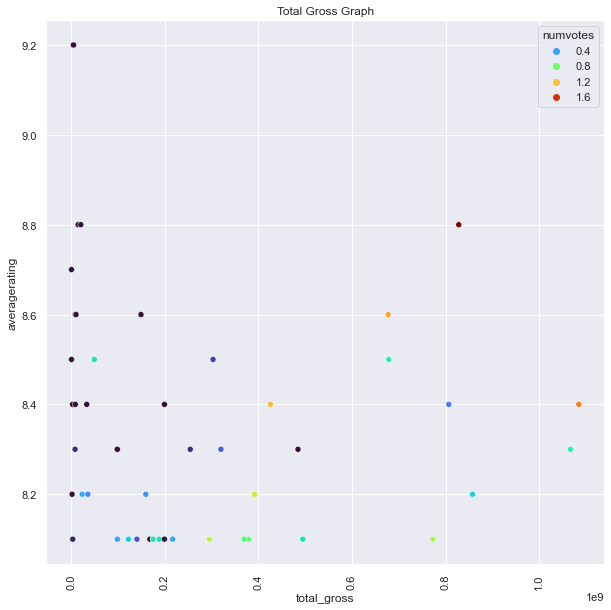

In [125]:
#checking the total gross
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = "total_gross", y = "averagerating", data = w, hue = "numvotes", palette = "turbo")
plt.title("Total Gross Graph");
plt.xticks(rotation = 90);

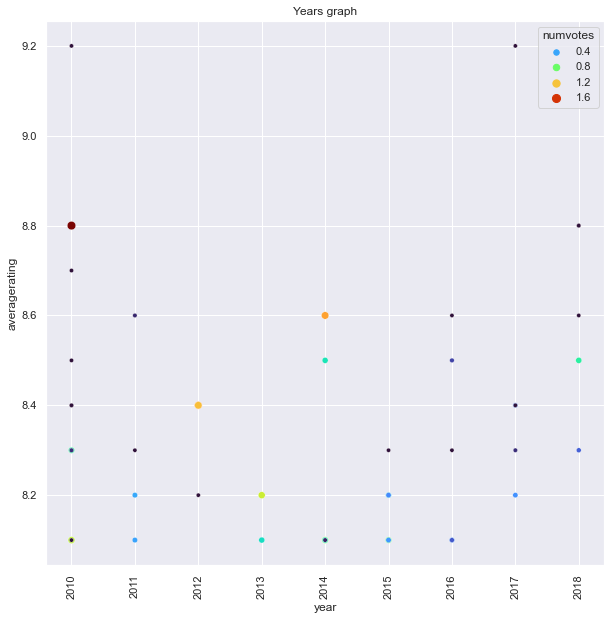

In [126]:
#checking the years with the highest movies produced
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(x = "year", y = "averagerating", data = w, hue = "numvotes", size = "numvotes", palette = "turbo")
plt.title("Years graph");
plt.xticks(rotation = 90);

# Conclusion 

.The final model is a good illustration of movies watched in Box Office

.Docuentary and adventure genre are the most watched genres in Box Office

.There are different types of movies produced but the one that is mostly seen is The Runways 

.The year 2010 is the year in which most movies were produced



# Recommendation

.With Documentary and Adventure having being the most watched genres it would be a good choice for Microsoft to produce a movie in those genres

.With Box Office having the most movies, once Microsoft have produced their movie they should take it to Box Office to be watched 

.The movie that microsoft should produce should be similar to runaways as it is the movie with the most views

